In [63]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [64]:
train_df = pd.read_csv('C:/Users/User/Desktop/work_projects/brain_signals/3/2024_target_sbj_comparison_train.csv', sep=';')
test_df = pd.read_csv('C:/Users/User/Desktop/work_projects/brain_signals/3/2024_target_sbj_comparison_test.csv', sep=';')

In [65]:
test_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,2.468926,1.815387,3.412927,-5.954469,2.168631,-5.783015,2.832003,2.178464,4.720006,-4.865236,...,1.307078,1.452309,6.361317,4.626412,-6.172315,0.290462,3.630774,5.446160,8.096221,7.879358
1,-1.925453,-2.567271,-5.205855,1.640201,-2.697665,-0.141982,-1.354948,-0.927070,-7.701812,2.852523,...,12.051910,5.562420,10.719668,5.182356,12.551102,11.267466,8.628883,7.844439,8.589932,6.602179
2,0.995045,6.169280,-0.199009,4.112853,4.094288,8.122539,0.597027,5.439580,2.255436,2.985135,...,2.122763,0.530691,2.047144,1.584886,-7.695016,-3.515826,1.260390,-1.923754,0.726406,-0.264148
3,-8.395296,-9.583309,-9.345707,-9.108104,-4.651760,-10.407328,-6.652876,-7.682488,-7.999291,-6.652876,...,-6.415273,-11.008926,-11.984196,-7.647810,-1.029612,-3.801643,-3.484840,-6.969680,-7.647810,-2.365302
4,-8.996880,-7.747313,3.832004,-2.415829,2.321995,-1.575640,-4.581744,-5.581397,5.498093,0.249913,...,-6.747660,-9.246793,-7.961127,-6.551344,-12.828884,-6.830964,-7.830617,-9.663315,-8.375769,-7.795271
5,1.928213,-4.927654,-6.213129,-3.642179,-8.744429,-8.815522,2.713781,-3.570764,-3.785010,-1.999628,...,-0.214246,-1.428306,-3.056995,-0.497650,-2.713781,-5.856053,-1.642551,-0.999814,-3.483553,0.426558
6,8.245327,10.394109,13.692240,4.097678,12.884242,5.273088,7.645667,9.444647,12.792749,2.398641,...,-1.499150,-1.998867,-3.780704,-1.890352,-9.194789,-5.696771,0.299830,-2.148782,-2.039590,-1.890352
7,-13.609768,-13.249721,-9.073179,-6.192805,-7.741906,-9.390645,-11.521497,-13.537759,-9.865282,-8.641123,...,5.472711,5.256683,4.444427,3.655900,3.024393,5.400702,0.360047,0.216028,-1.146949,-1.863792
8,-6.174389,-5.620277,1.662335,-3.166353,1.024420,-3.073259,-8.153359,-7.203453,-1.266541,-0.395794,...,-13.852795,-18.127372,-11.111013,-19.936782,-3.245512,-4.274577,-18.285689,-16.781672,-14.105471,-19.069966
9,4.611140,-1.032345,-9.428748,-11.080500,-11.852631,-10.071311,0.757053,-3.441149,-9.566394,-10.874031,...,0.412938,0.068823,0.479586,0.959172,11.080500,3.441149,-0.688230,-1.307637,0.137025,0.342562


In [66]:
class_distribution_train = train_df['class'].value_counts()
class_distribution_train

class
1    515
0    485
Name: count, dtype: int64

In [67]:
# class_distribution_test = test_df['class'].value_counts()
# class_distribution_test

# Разбиение датафрейма на 6 датафреймов для разных каналов

In [68]:
train_dfs_raw = []

for i in range(6):
    df_new = train_df.iloc[:, i::6]

    if df_new.shape[1] > 0 and df_new.columns[-1] == 'class':
        df_new.drop('class', axis=1, inplace=True)

    new_columns_names = [str(i) for i in range(250)]
    df_new.columns = new_columns_names


    train_dfs_raw.append(df_new)

train_df_raw_0 = train_dfs_raw[0]
train_df_raw_1 = train_dfs_raw[1]
train_df_raw_2 = train_dfs_raw[2]
train_df_raw_3 = train_dfs_raw[3]
train_df_raw_4 = train_dfs_raw[4]
train_df_raw_5 = train_dfs_raw[5]

In [69]:
train_df_raw_2.iloc[:5, -5:]


,245,246,247,248,249
0,1.378586,0.583248,-0.636270,-0.424180,2.120901
1,3.564370,5.487998,5.714307,3.903834,2.263092
2,-1.430687,-2.425948,-2.861375,-2.861375,-2.612560
3,-3.352896,1.158273,3.535781,4.572130,5.852327
4,-4.494332,-4.431031,-5.760341,-7.216251,-8.165758


Тест

In [70]:
test_dfs_raw = []

for i in range(6):
    df_new = test_df.iloc[:, i::6]

    new_columns_names = [str(i) for i in range(250)]
    df_new.columns = new_columns_names


    test_dfs_raw.append(df_new)

test_df_raw_0 = test_dfs_raw[0]
test_df_raw_1 = test_dfs_raw[1]
test_df_raw_2 = test_dfs_raw[2]
test_df_raw_3 = test_dfs_raw[3]
test_df_raw_4 = test_dfs_raw[4]
test_df_raw_5 = test_dfs_raw[5]

In [71]:
test_df_raw_5.iloc[:5, -5:]

,245,246,247,248,249
0,2.096343,3.252946,3.325234,4.626412,7.879358
1,-0.354956,0.496938,2.981629,5.182356,6.602179
2,3.764104,3.830140,3.103734,1.584886,-0.264148
3,-4.572917,-9.540051,-11.116919,-7.647810,-2.365302
4,-1.078069,-2.321995,-4.478134,-6.551344,-7.795271


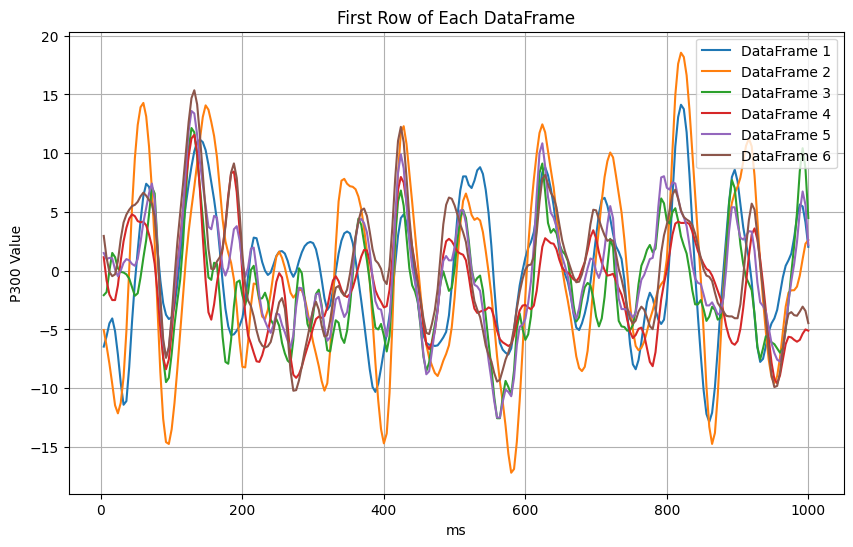

In [72]:
t_vals = np.arange(1, 251) * 4

plt.figure(figsize=(10,6))
for i, df in enumerate(train_dfs_raw):
    y_vals = df.iloc[8, :250]
    plt.plot(t_vals, y_vals, label=f'DataFrame {i+1}')

plt.xlabel('ms')
plt.ylabel('P300 Value')
plt.title('First Row of Each DataFrame')
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Применение скользящего среднего

In [73]:
window_size = 10

def smoothing_row(df, window_size):
    smoothed_df = df.apply(lambda row: row.rolling(window=window_size, min_periods=1).mean(), axis=1)
    return smoothed_df

train_dfs_raw_smooth = [smoothing_row(df, window_size) for df in train_dfs_raw]

Тест

In [74]:
def smoothing_row(df, window_size):
    smoothed_df = df.apply(lambda row: row.rolling(window=window_size, min_periods=1).mean(), axis=1)
    return smoothed_df

test_dfs_raw_smooth = [smoothing_row(df, window_size) for df in test_dfs_raw]

In [75]:
train_dfs_raw_smooth[0].head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,7.476176,7.661755,7.670592,7.476176,7.105019,6.707350,6.385427,6.130730,5.885501,5.604481,...,1.558862,0.349949,-0.911987,-2.110297,-3.202561,-4.236500,-5.222719,-6.076382,-6.686141,-6.956556
1,2.545978,2.093360,1.508728,0.735505,-0.192363,-1.188123,-2.149937,-3.026886,-3.834684,-4.639339,...,4.430003,3.411611,2.710053,2.217830,1.804816,1.425748,1.114573,0.826029,0.537484,0.339464
2,-10.325831,-11.476601,-12.088272,-12.238598,-11.992893,-11.466234,-10.841234,-10.318056,-9.994077,-9.840641,...,2.102488,1.779029,1.312500,0.833531,0.391884,-0.068424,-0.572275,-1.057465,-1.474230,-1.766588
3,4.572130,3.170010,1.950776,1.188754,0.841272,0.782342,0.897008,1.066830,1.259876,1.469178,...,-10.869478,-10.491515,-10.345207,-10.369591,-10.400072,-10.290341,-9.912378,-9.223511,-8.296892,-7.236158
4,4.177830,3.734726,3.460424,3.386574,3.481525,3.692526,4.006014,4.304430,4.459165,4.450021,...,-15.337698,-14.793315,-14.134990,-13.255114,-12.179006,-11.045928,-10.014131,-9.184895,-8.672161,-8.564551


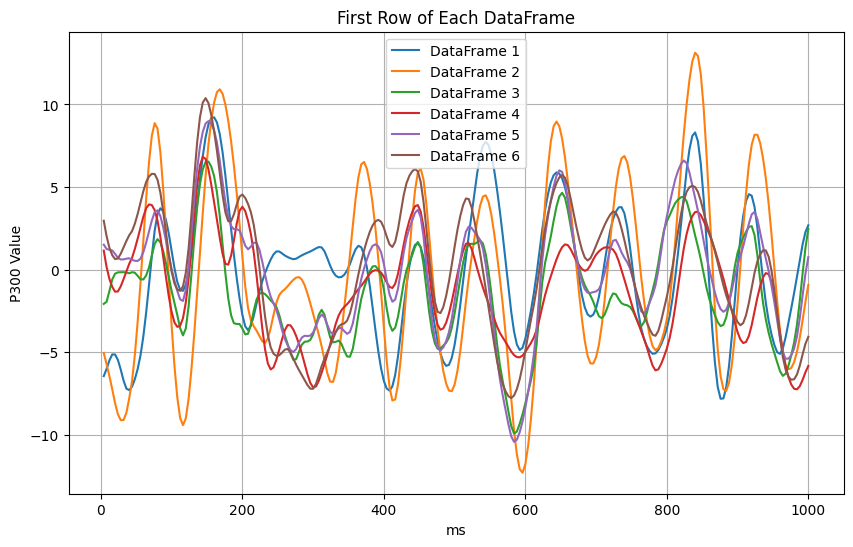

In [76]:
t_vals = np.arange(1, 251) * 4

plt.figure(figsize=(10,6))
for i, df in enumerate(train_dfs_raw_smooth):
    y_vals = df.iloc[8, :250]
    plt.plot(t_vals, y_vals, label=f'DataFrame {i+1}')

plt.xlabel('ms')
plt.ylabel('P300 Value')
plt.title('First Row of Each DataFrame')
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Обрезание сигнала [200ms - 800ms]

In [77]:
train_dfs_raw_cut_smooth = []

for df in train_dfs_raw_smooth:
    df = df.iloc[:, 50:-50]
    train_dfs_raw_cut_smooth.append(df)

train_df_raw_cut_0 = train_dfs_raw_cut_smooth[0]

Тест

In [78]:
test_dfs_raw_cut_smooth = []

for df in test_dfs_raw_smooth:
    df = df.iloc[:, 50:-50]
    test_dfs_raw_cut_smooth.append(df)

test_df_raw_cut_0 = test_dfs_raw_cut_smooth[0]

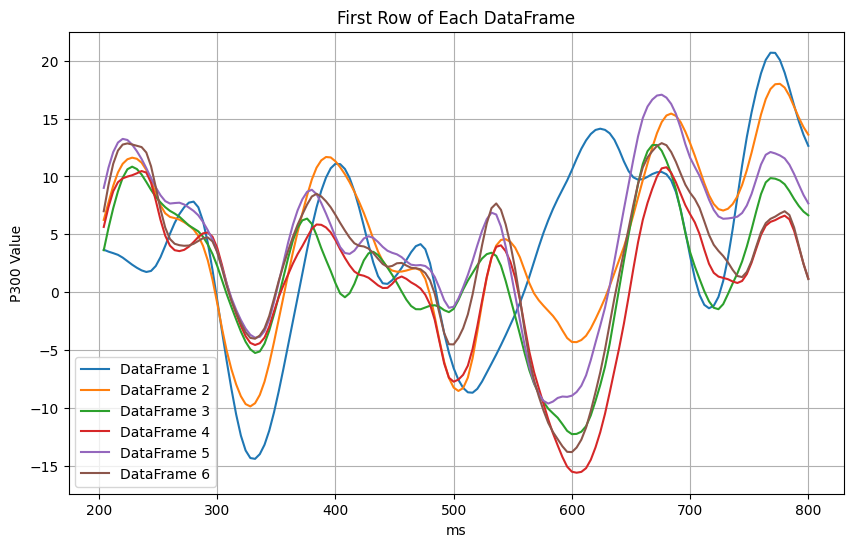

In [79]:
t_vals = np.arange(51, 201) * 4

plt.figure(figsize=(10,6))
for i, df in enumerate(test_dfs_raw_cut_smooth):
    y_vals = df.iloc[0, :150]
    plt.plot(t_vals, y_vals, label=f'DataFrame {i+1}')

plt.xlabel('ms')
plt.ylabel('P300 Value')
plt.title('First Row of Each DataFrame')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [80]:
train_df_raw_cut_0

,50,51,52,53,54,55,56,57,58,59,...,190,191,192,193,194,195,196,197,198,199
0,-1.521747,-1.426306,-1.177100,-0.763524,-0.127254,0.657479,1.389190,1.945927,2.407223,2.842007,...,0.090138,0.869569,1.606583,2.242853,2.773078,3.223770,3.579021,3.817622,3.981992,4.194082
1,1.437063,2.591240,3.230564,3.185302,2.410193,1.018391,-0.826029,-2.981624,-5.318266,-7.677540,...,-8.995791,-8.599750,-8.164104,-7.762406,-7.496492,-7.349391,-7.236237,-7.111767,-6.953350,-6.710068
2,1.331161,0.858412,0.398104,-0.118187,-0.696683,-1.237856,-1.567536,-1.523993,-1.076126,-0.354562,...,-0.447867,-0.242595,0.062204,0.466529,0.926837,1.306280,1.530214,1.704384,2.015403,2.550356
3,-8.211546,-7.102042,-5.931577,-4.724535,-3.505300,-2.304354,-1.310677,-0.755926,-0.682771,-0.938811,...,4.468495,3.639416,2.578681,1.365543,0.134116,-1.018061,-2.133661,-3.267549,-4.370957,-5.303671
4,-1.981304,-2.019284,-1.842043,-1.392610,-0.829236,-0.341822,0.006330,0.291182,0.607684,1.012807,...,7.728985,6.760488,5.678050,4.589282,3.500515,2.405417,1.297659,0.063300,-1.341969,-2.753569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.056234,2.000443,3.024670,4.000886,4.793062,5.321179,5.553230,5.497218,5.169145,4.633026,...,3.296730,2.232495,1.416314,0.848188,0.400089,0.024005,-0.144032,-0.016004,0.264058,0.480106
996,6.416033,8.340212,9.765997,10.706005,11.191782,11.198091,10.706005,9.810158,8.668268,7.444364,...,10.466272,9.772305,9.198206,8.693504,8.176183,7.595775,6.952279,6.283548,5.633744,4.939777
997,0.766145,0.728954,0.810775,1.026486,1.324018,1.666179,2.097601,2.677788,3.429057,4.351406,...,5.392768,5.288632,5.147304,4.901840,4.351406,3.443933,2.246367,0.781022,-0.870281,-2.395133
998,1.987979,2.989171,4.019175,4.984353,5.733447,6.129602,6.122399,5.697433,4.804283,3.392530,...,-4.876311,-5.200438,-5.272466,-5.193235,-4.897919,-4.321694,-3.486166,-2.557002,-1.735880,-1.238886


# Нейросеть CNN-LSTM

In [81]:
# Convert each dataframe to a NumPy array and stack them
data_arrays = [df.values for df in train_dfs_raw_cut_smooth]  # List of arrays with shape [500, 150]
data = np.stack(data_arrays, axis=1)  # Shape: [500, 6, 150]

# Convert labels to NumPy array (ensure it's binary: 0 or 1)
labels = train_df.iloc[:, -1].values  # Shape: [500]


In [82]:
class SignalDataset(Dataset):
    def __init__(self, data, labels):
        """
        Args:
            data (numpy.ndarray): Array of shape [num_samples, channels, time_steps]
            labels (numpy.ndarray): Array of shape [num_samples]
        """
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


In [83]:
from torch.utils.data import DataLoader, Subset
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

# Create Dataset instances
train_dataset = SignalDataset(X_train, y_train)
test_dataset = SignalDataset(X_test, y_test)

# Now, let's balance the test dataset
# Get indices for each class
class_0_indices = np.where(y_test == 0)[0]
class_1_indices = np.where(y_test == 1)[0]

# We will take the minimum length of both classes to ensure balance
min_class_size = min(len(class_0_indices), len(class_1_indices))

# Select a random subset of indices from each class to balance the test dataset
class_0_sampled = np.random.choice(class_0_indices, min_class_size, replace=False)
class_1_sampled = np.random.choice(class_1_indices, min_class_size, replace=False)

# Combine the indices
balanced_indices = np.concatenate([class_0_sampled, class_1_sampled])

# Create a balanced test dataset
balanced_test_dataset = Subset(test_dataset, balanced_indices)

# Create DataLoader for the balanced test set
batch_size = 32
test_loader = DataLoader(balanced_test_dataset, batch_size=batch_size, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [84]:
class CNN_LSTM_Model(nn.Module):
    def __init__(self, num_channels=6, time_steps=150, cnn_out_channels=64, 
                 cnn_kernel_size=3, lstm_hidden_size=128, lstm_num_layers=2, 
                 num_classes=2, dropout=0.5):
        super(CNN_LSTM_Model, self).__init__()
        
        # CNN component
        self.conv1 = nn.Conv1d(in_channels=num_channels, out_channels=cnn_out_channels, kernel_size=cnn_kernel_size, padding=1)
        self.bn1 = nn.BatchNorm1d(cnn_out_channels)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        
        # Calculate the new time_steps after Conv and Pooling
        self.conv_output_time_steps = time_steps // 2  # After MaxPool with kernel_size=2
        
        # LSTM component
        self.lstm = nn.LSTM(input_size=cnn_out_channels, 
                            hidden_size=lstm_hidden_size, 
                            num_layers=lstm_num_layers, 
                            batch_first=True, 
                            dropout=dropout)
        
        # Fully connected layer
        self.fc = nn.Linear(lstm_hidden_size, num_classes)
        
        # Dropout
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        """
        Args:
            x: Tensor of shape [batch_size, channels, time_steps]
        Returns:
            out: Tensor of shape [batch_size, num_classes]
        """
        # CNN layers
        x = self.conv1(x)  # [batch, cnn_out_channels, time_steps]
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)  # [batch, cnn_out_channels, time_steps/2]
        
        # Prepare for LSTM: transpose to [batch, time_steps, features]
        x = x.permute(0, 2, 1)  # [batch, time_steps/2, cnn_out_channels]
        
        # LSTM layers
        lstm_out, (hn, cn) = self.lstm(x)  # lstm_out: [batch, time_steps/2, lstm_hidden_size]
        
        # Take the last time step's output
        out = lstm_out[:, -1, :]  # [batch, lstm_hidden_size]
        
        out = self.dropout(out)
        out = self.fc(out)  # [batch, num_classes]
        
        return out


In [85]:
import torch
import torch.nn as nn
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Assuming `labels` is already defined (e.g., the target labels for training)
# Convert labels to a numpy array if they are not already
labels = np.array(labels)

# Calculate class weights (use sklearn.utils.class_weight)
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Instantiate the model
model = CNN_LSTM_Model()
model.to(device)

# Use weighted loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Define optimizer (Adam optimizer with a learning rate of 1e-3)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


Using device: cpu


In [86]:
from tqdm import tqdm

num_epochs = 30  # Adjust based on convergence
best_accuracy = 0.0

# Outer loop with tqdm for epoch tracking
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    # Use tqdm for batch-level progress
    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as batch_progress:
        for batch_idx, (signals, targets) in enumerate(batch_progress):
            signals = signals.to(device)  # [batch, 6, 150]
            targets = targets.to(device)  # [batch]
            
            # Forward pass
            outputs = model(signals)  # [batch, 2]
            loss = criterion(outputs, targets)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            # Update tqdm with current loss for each batch
            batch_progress.set_postfix(loss=running_loss / (batch_idx + 1))
    
    avg_loss = running_loss / len(train_loader)
    
    # Evaluation on the test set
    model.eval()
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for signals, targets in test_loader:
            signals = signals.to(device)
            targets = targets.to(device)
            
            outputs = model(signals)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    
    accuracy = accuracy_score(all_targets, all_preds)
    cm = confusion_matrix(all_targets, all_preds)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}')
    print(f'Confusion Matrix:\n{cm}')
    
    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(model.state_dict(), 'best_cnn_lstm_model.pth')
        print('Best model saved.')

Epoch 1/30: 100%|██████████| 25/25 [00:01<00:00, 15.96batch/s, loss=0.652]


Epoch [1/30], Loss: 0.6517, Test Accuracy: 0.6959
Confusion Matrix:
[[63 34]
 [25 72]]
Best model saved.


Epoch 2/30: 100%|██████████| 25/25 [00:01<00:00, 17.94batch/s, loss=0.562]


Epoch [2/30], Loss: 0.5622, Test Accuracy: 0.7629
Confusion Matrix:
[[82 15]
 [31 66]]
Best model saved.


Epoch 3/30: 100%|██████████| 25/25 [00:01<00:00, 17.90batch/s, loss=0.448]


Epoch [3/30], Loss: 0.4480, Test Accuracy: 0.8608
Confusion Matrix:
[[79 18]
 [ 9 88]]
Best model saved.


Epoch 4/30: 100%|██████████| 25/25 [00:01<00:00, 18.56batch/s, loss=0.325]


Epoch [4/30], Loss: 0.3253, Test Accuracy: 0.8763
Confusion Matrix:
[[87 10]
 [14 83]]
Best model saved.


Epoch 5/30: 100%|██████████| 25/25 [00:01<00:00, 17.48batch/s, loss=0.268]


Epoch [5/30], Loss: 0.2681, Test Accuracy: 0.8763
Confusion Matrix:
[[87 10]
 [14 83]]


Epoch 6/30: 100%|██████████| 25/25 [00:01<00:00, 18.17batch/s, loss=0.219]


Epoch [6/30], Loss: 0.2186, Test Accuracy: 0.8711
Confusion Matrix:
[[83 14]
 [11 86]]


Epoch 7/30: 100%|██████████| 25/25 [00:01<00:00, 19.52batch/s, loss=0.211]


Epoch [7/30], Loss: 0.2107, Test Accuracy: 0.8505
Confusion Matrix:
[[89  8]
 [21 76]]


Epoch 8/30: 100%|██████████| 25/25 [00:01<00:00, 18.82batch/s, loss=0.18] 


Epoch [8/30], Loss: 0.1798, Test Accuracy: 0.8866
Confusion Matrix:
[[90  7]
 [15 82]]
Best model saved.


Epoch 9/30: 100%|██████████| 25/25 [00:01<00:00, 17.07batch/s, loss=0.172]


Epoch [9/30], Loss: 0.1717, Test Accuracy: 0.9072
Confusion Matrix:
[[89  8]
 [10 87]]
Best model saved.


Epoch 10/30: 100%|██████████| 25/25 [00:01<00:00, 18.69batch/s, loss=0.129]


Epoch [10/30], Loss: 0.1289, Test Accuracy: 0.8711
Confusion Matrix:
[[88  9]
 [16 81]]


Epoch 11/30: 100%|██████████| 25/25 [00:01<00:00, 18.57batch/s, loss=0.139]


Epoch [11/30], Loss: 0.1387, Test Accuracy: 0.9072
Confusion Matrix:
[[89  8]
 [10 87]]


Epoch 12/30: 100%|██████████| 25/25 [00:01<00:00, 18.27batch/s, loss=0.121]


Epoch [12/30], Loss: 0.1208, Test Accuracy: 0.8814
Confusion Matrix:
[[84 13]
 [10 87]]


Epoch 13/30: 100%|██████████| 25/25 [00:01<00:00, 19.29batch/s, loss=0.127] 


Epoch [13/30], Loss: 0.1265, Test Accuracy: 0.8866
Confusion Matrix:
[[88  9]
 [13 84]]


Epoch 14/30: 100%|██████████| 25/25 [00:01<00:00, 18.09batch/s, loss=0.108] 


Epoch [14/30], Loss: 0.1077, Test Accuracy: 0.8918
Confusion Matrix:
[[89  8]
 [13 84]]


Epoch 15/30: 100%|██████████| 25/25 [00:01<00:00, 18.26batch/s, loss=0.0785]


Epoch [15/30], Loss: 0.0785, Test Accuracy: 0.8866
Confusion Matrix:
[[87 10]
 [12 85]]


Epoch 16/30: 100%|██████████| 25/25 [00:01<00:00, 17.76batch/s, loss=0.0714]


Epoch [16/30], Loss: 0.0714, Test Accuracy: 0.8814
Confusion Matrix:
[[89  8]
 [15 82]]


Epoch 17/30: 100%|██████████| 25/25 [00:01<00:00, 18.34batch/s, loss=0.0671]


Epoch [17/30], Loss: 0.0671, Test Accuracy: 0.8660
Confusion Matrix:
[[89  8]
 [18 79]]


Epoch 18/30: 100%|██████████| 25/25 [00:01<00:00, 19.32batch/s, loss=0.0671]


Epoch [18/30], Loss: 0.0671, Test Accuracy: 0.8660
Confusion Matrix:
[[83 14]
 [12 85]]


Epoch 19/30: 100%|██████████| 25/25 [00:01<00:00, 18.33batch/s, loss=0.134] 


Epoch [19/30], Loss: 0.1342, Test Accuracy: 0.8711
Confusion Matrix:
[[91  6]
 [19 78]]


Epoch 20/30: 100%|██████████| 25/25 [00:01<00:00, 18.73batch/s, loss=0.116]


Epoch [20/30], Loss: 0.1159, Test Accuracy: 0.9021
Confusion Matrix:
[[86 11]
 [ 8 89]]


Epoch 21/30: 100%|██████████| 25/25 [00:01<00:00, 19.15batch/s, loss=0.0715]


Epoch [21/30], Loss: 0.0715, Test Accuracy: 0.8814
Confusion Matrix:
[[88  9]
 [14 83]]


Epoch 22/30: 100%|██████████| 25/25 [00:01<00:00, 18.59batch/s, loss=0.0368]


Epoch [22/30], Loss: 0.0368, Test Accuracy: 0.9021
Confusion Matrix:
[[88  9]
 [10 87]]


Epoch 23/30: 100%|██████████| 25/25 [00:01<00:00, 18.48batch/s, loss=0.0421]


Epoch [23/30], Loss: 0.0421, Test Accuracy: 0.8969
Confusion Matrix:
[[89  8]
 [12 85]]


Epoch 24/30: 100%|██████████| 25/25 [00:01<00:00, 19.08batch/s, loss=0.0552]


Epoch [24/30], Loss: 0.0552, Test Accuracy: 0.9124
Confusion Matrix:
[[90  7]
 [10 87]]
Best model saved.


Epoch 25/30: 100%|██████████| 25/25 [00:01<00:00, 18.51batch/s, loss=0.1]   


Epoch [25/30], Loss: 0.1000, Test Accuracy: 0.8866
Confusion Matrix:
[[83 14]
 [ 8 89]]


Epoch 26/30: 100%|██████████| 25/25 [00:01<00:00, 17.04batch/s, loss=0.0703]


Epoch [26/30], Loss: 0.0703, Test Accuracy: 0.8608
Confusion Matrix:
[[84 13]
 [14 83]]


Epoch 27/30: 100%|██████████| 25/25 [00:01<00:00, 19.12batch/s, loss=0.105] 


Epoch [27/30], Loss: 0.1050, Test Accuracy: 0.9021
Confusion Matrix:
[[91  6]
 [13 84]]


Epoch 28/30: 100%|██████████| 25/25 [00:01<00:00, 18.29batch/s, loss=0.041] 


Epoch [28/30], Loss: 0.0410, Test Accuracy: 0.8918
Confusion Matrix:
[[90  7]
 [14 83]]


Epoch 29/30: 100%|██████████| 25/25 [00:01<00:00, 18.94batch/s, loss=0.0223]


Epoch [29/30], Loss: 0.0223, Test Accuracy: 0.8711
Confusion Matrix:
[[88  9]
 [16 81]]


Epoch 30/30: 100%|██████████| 25/25 [00:01<00:00, 18.73batch/s, loss=0.0275]


Epoch [30/30], Loss: 0.0275, Test Accuracy: 0.8454
Confusion Matrix:
[[85 12]
 [18 79]]


In [87]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the best model
model.load_state_dict(torch.load('best_cnn_lstm_model.pth'))
model.eval()

# Final evaluation on the test set
all_preds = []
all_targets = []

with torch.no_grad():
    for signals, targets in test_loader:
        signals = signals.to(device)
        targets = targets.to(device)
        
        outputs = model(signals)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Calculate final accuracy
final_accuracy = accuracy_score(all_targets, all_preds)

# Calculate confusion matrix
final_cm = confusion_matrix(all_targets, all_preds)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = final_cm.ravel()

# Print the accuracy and confusion matrix in a readable way
print(f'Final Test Accuracy: {final_accuracy:.4f}')
print(f'Final Confusion Matrix (readable format):')
print(f'True Negative (TN): {TN}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')
print(f'True Positive (TP): {TP}')

# Classification Report (precision, recall, F1-score)
print("\nClassification Report:\n", classification_report(all_targets, all_preds))

# Optionally, you can print the confusion matrix in the usual format as well
print(f'\nConfusion Matrix (standard format):\n{final_cm}')

# Create the Comparison Table: True Labels vs Predicted Labels
comparison_df = pd.DataFrame({
    'True Label': all_targets,
    'Predicted Label': all_preds
})

print("\nComparison of True and Predicted Labels (first 10 rows):")
print(comparison_df.head(10))  # Display the first 10 rows for inspection


C:\Users\User\AppData\Local\Temp\ipykernel_31184\1321989098.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_cnn_lstm_model.pth'))


Final Test Accuracy: 0.9124
Final Confusion Matrix (readable format):
True Negative (TN): 90
False Positive (FP): 7
False Negative (FN): 10
True Positive (TP): 87

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        97
           1       0.93      0.90      0.91        97

    accuracy                           0.91       194
   macro avg       0.91      0.91      0.91       194
weighted avg       0.91      0.91      0.91       194


Confusion Matrix (standard format):
[[90  7]
 [10 87]]

Comparison of True and Predicted Labels (first 10 rows):
   True Label  Predicted Label
0           0                0
1           0                0
2           0                0
3           0                0
4           0                0
5           0                0
6           0                0
7           0                0
8           0                0
9           0                0


# Предсказание модели

In [88]:
# Convert each dataframe in test_dfs_raw_smooth to a NumPy array and stack them
test_data_arrays = [df.values for df in test_dfs_raw_cut_smooth]  # List of arrays with shape [N, 150]
test_data = np.stack(test_data_arrays, axis=1)  # Shape: [N, 6, 150]

# Create a Dataset instance for test-only (without labels)
class TestOnlyDataset(Dataset):
    def __init__(self, data):
        """
        Args:
            data (numpy.ndarray): Array of shape [num_samples, channels, time_steps]
        """
        self.data = torch.tensor(data, dtype=torch.float32)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

# Create a DataLoader for `test_dfs_raw_smooth` (features only)
test_only_dataset = TestOnlyDataset(test_data)
batch_size = 32
test_only_loader = DataLoader(test_only_dataset, batch_size=batch_size, shuffle=False)

# Use the trained model to make predictions on the test data (features only)
model.eval()  # Set model to evaluation mode

all_preds = []

# Iterate over the test-only loader and make predictions
with torch.no_grad():
    for signals in test_only_loader:
        signals = signals.to(device)  # Move to GPU if needed
        
        outputs = model(signals)  # Get model output
        _, preds = torch.max(outputs, 1)  # Get predicted class (0 or 1)
        
        all_preds.extend(preds.cpu().numpy())  # Store predictions on CPU

# all_preds now contains all the predicted class labels (0 or 1)
print(f'Predicted classes for the test set: {all_preds}')


Predicted classes for the test set: [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]


In [89]:
len(all_preds)

50

In [90]:
folder_path = 'C:/Users/User/Desktop/work_projects/brain_signals/3'

In [91]:
import os
# Ensure the folder exists, create it if necessary
os.makedirs(folder_path, exist_ok=True)


# Convert predictions to binary string
binary_string = ''.join([str(pred) for pred in all_preds])

# Define the full file path
file_path = os.path.join(folder_path, 'predictions.csv')

# Write the binary string to the CSV file without any headers or index
with open(file_path, 'w') as f:
    f.write(binary_string)

print(f"File saved to: {file_path}")

File saved to: C:/Users/User/Desktop/work_projects/brain_signals/3\predictions.csv


In [92]:
answer = pd.read_csv('C:/Users/User/Desktop/work_projects/brain_signals/3/predictions.csv')

In [93]:
answer

,10100111000101010101100000110111011111100001110111
